This notebook:
1. Uses the CCI integrated dataset.
2. Filters to diabetes patients.
3. Runs VAE and TabNet with parameter input_file.
4. Performs clustering analysis and visualization (t-SNE, UMAP) as before.

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
from scipy.stats import f_oneway, kruskal, shapiro, levene

project_dir = os.path.abspath("..")
data_dir = os.path.join(project_dir, "Data")
sys.path.append(project_dir)

from vae_model import main as vae_main
from tabnet_model import main as tabnet_main

### Load CCI data

In [2]:
cci_file='patient_data_with_health_index_cci.pkl'
cci_path=os.path.join(data_dir,cci_file)
if not os.path.exists(cci_path):
    raise FileNotFoundError("CCI file not found. Run 01_full_dataset_with_cci first.")

patient_data=pd.read_pickle(cci_path)

### Filter to diabetes patients

In [3]:
conditions=pd.read_csv(os.path.join(r'E:\DataGen\synthea\output\csv','conditions.csv'),usecols=['PATIENT','DESCRIPTION'])
diabetes_patients=conditions[conditions['DESCRIPTION'].str.lower().str.contains('diabetes')]['PATIENT'].unique()

subset_data=patient_data[patient_data['Id'].isin(diabetes_patients)].copy()
subset_file='patient_data_with_health_index_cci_diabetes.pkl'
subset_data.to_pickle(os.path.join(data_dir,subset_file))

### Run models on diabetes subset

In [4]:
vae_main(input_file=subset_file)
tabnet_main(input_file=subset_file)

INFO:vae_model:Data prepared for VAE.
INFO:vae_model:VAE model built.


Epoch 1/100
152/168 [==========================>...] - ETA: 0s - loss: 0.3496WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 2s 5ms/step - loss: 0.3439 - val_loss: 0.2996
Epoch 2/100
156/168 [==========================>...] - ETA: 0s - loss: 0.2796WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 4ms/step - loss: 0.2788 - val_loss: 0.2691
Epoch 3/100
159/168 [===========================>..] - ETA: 0s - loss: 0.2615WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2611 - val_loss: 0.2576
Epoch 4/100
168/168 [==============================] - ETA: 0s - loss: 0.2518WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 4ms/step - loss: 0.2518 - val_loss: 0.2512
Epoch 5/100
167/168 [============================>.] - ETA: 0s - loss: 0.2464WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2464 - val_loss: 0.2492
Epoch 6/100
156/168 [==========================>...] - ETA: 0s - loss: 0.2444WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2444 - val_loss: 0.2450
Epoch 7/100
156/168 [==========================>...] - ETA: 0s - loss: 0.2422WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2418 - val_loss: 0.2408
Epoch 8/100
168/168 [==============================] - 1s 4ms/step - loss: 0.2399 - val_loss: 0.2420
Epoch 9/100
165/168 [============================>.] - ETA: 0s - loss: 0.2386WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2389 - val_loss: 0.2395
Epoch 10/100
165/168 [============================>.] - ETA: 0s - loss: 0.2374WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2374 - val_loss: 0.2390
Epoch 11/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2365 - val_loss: 0.2407
Epoch 12/100
159/168 [===========================>..] - ETA: 0s - loss: 0.2365WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2364 - val_loss: 0.2387
Epoch 13/100
161/168 [===========================>..] - ETA: 0s - loss: 0.2356WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2362 - val_loss: 0.2354
Epoch 14/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2352 - val_loss: 0.2358
Epoch 15/100
165/168 [============================>.] - ETA: 0s - loss: 0.2342WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2342 - val_loss: 0.2354
Epoch 16/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2335 - val_loss: 0.2356
Epoch 17/100
166/168 [============================>.] - ETA: 0s - loss: 0.2340WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 6ms/step - loss: 0.2338 - val_loss: 0.2344
Epoch 18/100
165/168 [============================>.] - ETA: 0s - loss: 0.2328WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2328 - val_loss: 0.2336
Epoch 19/100
167/168 [============================>.] - ETA: 0s - loss: 0.2334WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2333 - val_loss: 0.2330
Epoch 20/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2326 - val_loss: 0.2340
Epoch 21/100
168/168 [==============================] - 1s 4ms/step - loss: 0.2329 - val_loss: 0.2352
Epoch 22/100
165/168 [============================>.] - ETA: 0s - loss: 0.2323WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2323 - val_loss: 0.2326
Epoch 23/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2318 - val_loss: 0.2334
Epoch 24/100
167/168 [============================>.] - ETA: 0s - loss: 0.2314WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2313 - val_loss: 0.2320
Epoch 25/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2310 - val_loss: 0.2322
Epoch 26/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2310 - val_loss: 0.2335
Epoch 27/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2307 - val_loss: 0.2330
Epoch 28/100
164/168 [============================>.] - ETA: 0s - loss: 0.2306WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2307 - val_loss: 0.2308
Epoch 29/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2305 - val_loss: 0.2319
Epoch 30/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2305 - val_loss: 0.2326
Epoch 31/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2295 - val_loss: 0.2326
Epoch 32/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2298 - val_loss: 0.2325
Epoch 33/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2304 - val_loss: 0.2311
Epoch 34/100
163/168 [============================>.] - ETA: 0s - loss: 0.2291WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 4ms/step - loss: 0.2291 - val_loss: 0.2301
Epoch 35/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2295 - val_loss: 0.2311
Epoch 36/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2292 - val_loss: 0.2304
Epoch 37/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2294 - val_loss: 0.2302
Epoch 38/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2289 - val_loss: 0.2320
Epoch 39/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2287 - val_loss: 0.2310
Epoch 40/100
168/168 [==============================] - 1s 4ms/step - loss: 0.2276 - val_loss: 0.2319
Epoch 41/100
167/168 [============================>.] - ETA: 0s - loss: 0.2287WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is 

168/168 [==============================] - 1s 5ms/step - loss: 0.2287 - val_loss: 0.2300
Epoch 42/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2281 - val_loss: 0.2307
Epoch 43/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2283 - val_loss: 0.2302
Epoch 44/100
165/168 [============================>.] - ETA: 0s - loss: 0.2288WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 4ms/step - loss: 0.2287 - val_loss: 0.2298
Epoch 45/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2283 - val_loss: 0.2309
Epoch 46/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2286 - val_loss: 0.2303
Epoch 47/100
161/168 [===========================>..] - ETA: 0s - loss: 0.2277WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2277 - val_loss: 0.2297
Epoch 48/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2278 - val_loss: 0.2304
Epoch 49/100
160/168 [===========================>..] - ETA: 0s - loss: 0.2281WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2282 - val_loss: 0.2290
Epoch 50/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2281 - val_loss: 0.2317
Epoch 51/100
166/168 [============================>.] - ETA: 0s - loss: 0.2281WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2281 - val_loss: 0.2287
Epoch 52/100
166/168 [============================>.] - ETA: 0s - loss: 0.2273WARNING:tensorflow:Found duplicated `Variable`s in Model's `weights`. This is usually caused by `Variable`s being shared by Layers in the Model. These `Variable`s will be treated as separate `Variable`s when the Model is restored. To avoid this, please save with `save_format="tf"`.


168/168 [==============================] - 1s 5ms/step - loss: 0.2273 - val_loss: 0.2279
Epoch 53/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2278 - val_loss: 0.2302
Epoch 54/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2276 - val_loss: 0.2297
Epoch 55/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2278 - val_loss: 0.2302
Epoch 56/100
168/168 [==============================] - 1s 4ms/step - loss: 0.2275 - val_loss: 0.2298
Epoch 57/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2273 - val_loss: 0.2293
Epoch 58/100
168/168 [==============================] - 1s 4ms/step - loss: 0.2272 - val_loss: 0.2302
Epoch 59/100
168/168 [==============================] - 1s 4ms/step - loss: 0.2268 - val_loss: 0.2293
Epoch 60/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2278 - val_loss: 0.2294
Epoch 61/100
168/168 [==============================] - 1s 5ms/step - loss: 0.2266 - val_loss: 

INFO:tensorflow:Assets written to: vae_model\assets


INFO:tensorflow:Assets written to: vae_model\assets
INFO:vae_model:VAE trained and saved.


INFO:tensorflow:Assets written to: vae_encoder\assets


INFO:tensorflow:Assets written to: vae_encoder\assets


INFO:tensorflow:Assets written to: vae_decoder\assets


INFO:tensorflow:Assets written to: vae_decoder\assets


1673/1673 [==============================] - 1s 727us/step


INFO:vae_model:Latent features saved.
INFO:tabnet_model:Patient data loaded.
INFO:tabnet_model:Data prepared for TabNet.
[I 2024-12-17 15:02:27,083] A new study created in memory with name: no-name-6c380ce1-d0b5-4607-a4a8-6bec862307b2


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 1.16212


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 1.03332


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 1.1795


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:04:16,060] Trial 0 finished with value: 1.269833592346375 and parameters: {'n_d': 47, 'n_a': 32, 'n_steps': 10, 'gamma': 1.6908313062392621, 'lambda_sparse': 0.0008824973161004945, 'lr': 0.0002167162011436696, 'cat_emb_dim': 2, 'n_shared': 1, 'n_independent': 2}. Best is trial 0 with value: 1.269833592346375.


Stop training because you reached max_epochs = 50 with best_epoch = 44 and best_val_0_rmse = 0.13456


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.18272


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.16398


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:06:21,492] Trial 1 finished with value: 0.026127449312284043 and parameters: {'n_d': 54, 'n_a': 9, 'n_steps': 9, 'gamma': 1.1240470214590415, 'lambda_sparse': 2.7387839918252993e-06, 'lr': 0.0073476560514392645, 'cat_emb_dim': 3, 'n_shared': 2, 'n_independent': 3}. Best is trial 1 with value: 0.026127449312284043.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.23064


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.29796


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 46 and best_val_0_rmse = 0.27007


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:08:05,177] Trial 2 finished with value: 0.07163892429924795 and parameters: {'n_d': 25, 'n_a': 26, 'n_steps': 4, 'gamma': 1.0944388082634302, 'lambda_sparse': 2.6558082542314216e-05, 'lr': 0.0016387918336712042, 'cat_emb_dim': 3, 'n_shared': 5, 'n_independent': 4}. Best is trial 1 with value: 0.026127449312284043.


Stop training because you reached max_epochs = 50 with best_epoch = 40 and best_val_0_rmse = 0.36645


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.3914


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 42 and best_val_0_rmse = 0.33455


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:11:28,405] Trial 3 finished with value: 0.1331333172586773 and parameters: {'n_d': 56, 'n_a': 41, 'n_steps': 10, 'gamma': 1.4703393518407668, 'lambda_sparse': 0.0007891966713116641, 'lr': 0.002529899345344113, 'cat_emb_dim': 5, 'n_shared': 4, 'n_independent': 5}. Best is trial 1 with value: 0.026127449312284043.



Early stopping occurred at epoch 41 with best_epoch = 31 and best_val_0_rmse = 0.44943


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 41 and best_val_0_rmse = 0.40022


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_rmse = 0.47077


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:13:03,840] Trial 4 finished with value: 0.19459500307938318 and parameters: {'n_d': 63, 'n_a': 16, 'n_steps': 9, 'gamma': 1.998125365829864, 'lambda_sparse': 7.298660838778996e-06, 'lr': 0.0011671347633978397, 'cat_emb_dim': 1, 'n_shared': 3, 'n_independent': 1}. Best is trial 1 with value: 0.026127449312284043.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.14178


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 44 and best_val_0_rmse = 0.20315


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.20224


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:15:10,136] Trial 5 finished with value: 0.03409074981029845 and parameters: {'n_d': 11, 'n_a': 24, 'n_steps': 7, 'gamma': 1.8236281207747265, 'lambda_sparse': 1.4737570050948102e-05, 'lr': 0.003679822755220056, 'cat_emb_dim': 5, 'n_shared': 3, 'n_independent': 4}. Best is trial 1 with value: 0.026127449312284043.


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.60058


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.505


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_rmse = 0.62138


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:16:52,013] Trial 6 finished with value: 0.33394382792651717 and parameters: {'n_d': 43, 'n_a': 17, 'n_steps': 7, 'gamma': 1.8175827166870808, 'lambda_sparse': 0.0002600251200855345, 'lr': 0.0006350538487535568, 'cat_emb_dim': 2, 'n_shared': 3, 'n_independent': 3}. Best is trial 1 with value: 0.026127449312284043.


Stop training because you reached max_epochs = 50 with best_epoch = 43 and best_val_0_rmse = 0.85053


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 46 with best_epoch = 36 and best_val_0_rmse = 0.93021


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 46 and best_val_0_rmse = 0.86884


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:19:03,160] Trial 7 finished with value: 0.7811923133671392 and parameters: {'n_d': 47, 'n_a': 64, 'n_steps': 9, 'gamma': 1.3903055562627782, 'lambda_sparse': 8.216817277749126e-05, 'lr': 0.0001593087812717236, 'cat_emb_dim': 5, 'n_shared': 2, 'n_independent': 4}. Best is trial 1 with value: 0.026127449312284043.


Stop training because you reached max_epochs = 50 with best_epoch = 41 and best_val_0_rmse = 0.08664


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_rmse = 0.07592


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 42 and best_val_0_rmse = 0.06417


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:20:24,223] Trial 8 finished with value: 0.005796054669086091 and parameters: {'n_d': 11, 'n_a': 43, 'n_steps': 5, 'gamma': 1.5418335101722547, 'lambda_sparse': 3.6770466153352683e-06, 'lr': 0.00968738470535029, 'cat_emb_dim': 4, 'n_shared': 2, 'n_independent': 4}. Best is trial 8 with value: 0.005796054669086091.


Stop training because you reached max_epochs = 50 with best_epoch = 44 and best_val_0_rmse = 0.50529


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.4016


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.3447


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:23:15,498] Trial 9 finished with value: 0.17847146447477655 and parameters: {'n_d': 27, 'n_a': 52, 'n_steps': 10, 'gamma': 1.312537637408263, 'lambda_sparse': 0.0005020540526796374, 'lr': 0.0012915838547956776, 'cat_emb_dim': 4, 'n_shared': 5, 'n_independent': 3}. Best is trial 8 with value: 0.005796054669086091.


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.04954


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 41 and best_val_0_rmse = 0.08352


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.04521


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:24:22,600] Trial 10 finished with value: 0.003824770105590205 and parameters: {'n_d': 8, 'n_a': 45, 'n_steps': 3, 'gamma': 1.6522508347239988, 'lambda_sparse': 1.2875157470033305e-06, 'lr': 0.009629827625160356, 'cat_emb_dim': 4, 'n_shared': 1, 'n_independent': 5}. Best is trial 10 with value: 0.003824770105590205.



Early stopping occurred at epoch 36 with best_epoch = 26 and best_val_0_rmse = 0.06172


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_rmse = 0.11864


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 49 with best_epoch = 39 and best_val_0_rmse = 0.05045


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:25:21,083] Trial 11 finished with value: 0.006810124654297881 and parameters: {'n_d': 9, 'n_a': 44, 'n_steps': 3, 'gamma': 1.6103215062705671, 'lambda_sparse': 1.063506894937962e-06, 'lr': 0.00990677273478011, 'cat_emb_dim': 4, 'n_shared': 1, 'n_independent': 5}. Best is trial 10 with value: 0.003824770105590205.



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_rmse = 0.09607


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.07709


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.08973


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:26:50,168] Trial 12 finished with value: 0.007741323081265436 and parameters: {'n_d': 21, 'n_a': 53, 'n_steps': 5, 'gamma': 1.6104424596918807, 'lambda_sparse': 1.0348745823464688e-06, 'lr': 0.004675223913179423, 'cat_emb_dim': 4, 'n_shared': 2, 'n_independent': 5}. Best is trial 10 with value: 0.003824770105590205.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.06097


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 40 with best_epoch = 30 and best_val_0_rmse = 0.08795


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_rmse = 0.11191


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:28:04,294] Trial 13 finished with value: 0.007992105898163675 and parameters: {'n_d': 16, 'n_a': 47, 'n_steps': 5, 'gamma': 1.2602301653883563, 'lambda_sparse': 4.32807415583915e-06, 'lr': 0.006074394537497023, 'cat_emb_dim': 4, 'n_shared': 1, 'n_independent': 4}. Best is trial 10 with value: 0.003824770105590205.


Stop training because you reached max_epochs = 50 with best_epoch = 45 and best_val_0_rmse = 0.26149


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.2036


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.24813


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:29:24,937] Trial 14 finished with value: 0.05713379047441783 and parameters: {'n_d': 34, 'n_a': 61, 'n_steps': 3, 'gamma': 1.5309571053245108, 'lambda_sparse': 2.008570510142658e-06, 'lr': 0.0005621528398678198, 'cat_emb_dim': 3, 'n_shared': 2, 'n_independent': 5}. Best is trial 10 with value: 0.003824770105590205.


Stop training because you reached max_epochs = 50 with best_epoch = 46 and best_val_0_rmse = 0.15857


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.14865


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.13638


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:30:53,320] Trial 15 finished with value: 0.021947172696271094 and parameters: {'n_d': 8, 'n_a': 35, 'n_steps': 5, 'gamma': 1.772982473573845, 'lambda_sparse': 8.803261081849369e-06, 'lr': 0.002926815458484083, 'cat_emb_dim': 4, 'n_shared': 1, 'n_independent': 4}. Best is trial 10 with value: 0.003824770105590205.


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.10946


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_rmse = 0.29986


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 48 and best_val_0_rmse = 0.13211


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:32:00,728] Trial 16 finished with value: 0.03978377570875786 and parameters: {'n_d': 17, 'n_a': 54, 'n_steps': 6, 'gamma': 1.9714515111740276, 'lambda_sparse': 3.7622706045031084e-06, 'lr': 0.00963632035052023, 'cat_emb_dim': 2, 'n_shared': 2, 'n_independent': 2}. Best is trial 10 with value: 0.003824770105590205.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_rmse = 1.28492


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_rmse = 1.46568


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_rmse = 1.26429


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:32:45,552] Trial 17 finished with value: 1.7992212809037094 and parameters: {'n_d': 32, 'n_a': 39, 'n_steps': 4, 'gamma': 1.4707725584406917, 'lambda_sparse': 4.3927559661289956e-05, 'lr': 0.0003280873724287853, 'cat_emb_dim': 5, 'n_shared': 4, 'n_independent': 5}. Best is trial 10 with value: 0.003824770105590205.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 1.10767


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 1.1406


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 1.0956


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:34:04,469] Trial 18 finished with value: 1.2427518696261617 and parameters: {'n_d': 15, 'n_a': 47, 'n_steps': 4, 'gamma': 1.6899357646718767, 'lambda_sparse': 1.8301968753478742e-06, 'lr': 0.00010135845380450769, 'cat_emb_dim': 3, 'n_shared': 1, 'n_independent': 4}. Best is trial 10 with value: 0.003824770105590205.


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.17022


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 47 and best_val_0_rmse = 0.19144


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 50 with best_epoch = 49 and best_val_0_rmse = 0.15534


c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2024-12-17 15:35:31,117] Trial 19 finished with value: 0.029918163198553584 and parameters: {'n_d': 25, 'n_a': 31, 'n_steps': 6, 'gamma': 1.2253532225881112, 'lambda_sparse': 7.601659803660971e-06, 'lr': 0.001989025893275289, 'cat_emb_dim': 4, 'n_shared': 2, 'n_independent': 2}. Best is trial 10 with value: 0.003824770105590205.
INFO:tabnet_model:Best trial: {'n_d': 8, 'n_a': 45, 'n_steps': 3, 'gamma': 1.6522508347239988, 'lambda_sparse': 1.2875157470033305e-06, 'lr': 0.009629827625160356, 'cat_emb_dim': 4, 'n_shared': 1, 'n_independent': 5}
c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 4.5018  | val_0_rmse: 2.03897 |  0:00:00s
epoch 1  | loss: 1.3898  | val_0_rmse: 1.34949 |  0:00:00s
epoch 2  | loss: 0.56017 | val_0_rmse: 0.83893 |  0:00:01s
epoch 3  | loss: 0.19813 | val_0_rmse: 0.57015 |  0:00:01s
epoch 4  | loss: 0.15264 | val_0_rmse: 0.40661 |  0:00:01s
epoch 5  | loss: 0.11575 | val_0_rmse: 0.4173  |  0:00:02s
epoch 6  | loss: 0.08605 | val_0_rmse: 0.3899  |  0:00:02s
epoch 7  | loss: 0.06787 | val_0_rmse: 0.35433 |  0:00:02s
epoch 8  | loss: 0.0525  | val_0_rmse: 0.36821 |  0:00:03s
epoch 9  | loss: 0.04292 | val_0_rmse: 0.29892 |  0:00:03s
epoch 10 | loss: 0.03581 | val_0_rmse: 0.2799  |  0:00:03s
epoch 11 | loss: 0.03121 | val_0_rmse: 0.24888 |  0:00:04s
epoch 12 | loss: 0.02644 | val_0_rmse: 0.23342 |  0:00:04s
epoch 13 | loss: 0.02262 | val_0_rmse: 0.23079 |  0:00:04s
epoch 14 | loss: 0.02027 | val_0_rmse: 0.20521 |  0:00:05s
epoch 15 | loss: 0.01732 | val_0_rmse: 0.20084 |  0:00:05s
epoch 16 | loss: 0.01724 | val_0_rmse: 0.17716 |  0:00:0

c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
INFO:tabnet_model:TabNet model trained and saved.
INFO:tabnet_model:Test MSE: 0.0009
INFO:tabnet_model:Test R2: 0.9971


Successfully saved model at tabnet_model.zip


### Analysis

In [ ]:
# Load latent features and predictions
latent_features = pd.read_csv('latent_features_vae.csv')
tabnet_predictions = pd.read_csv('tabnet_predictions.csv')
data_merged = latent_features.merge(tabnet_predictions,on='Id',how='inner')

X = data_merged.drop(columns=['Id','Predicted_Health_Index'])
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

cluster_range=range(2,10)
sil_kmeans=[]
for n in cluster_range:
    km=KMeans(n_clusters=n,random_state=42)
    labels=km.fit_predict(X_scaled)
    sil_kmeans.append(silhouette_score(X_scaled, labels))

optimal_k = cluster_range[np.argmax(sil_kmeans)]
kmeans=KMeans(n_clusters=optimal_k,random_state=42).fit(X_scaled)
kmeans_labels=kmeans.labels_

sil_agg=[]
for n in cluster_range:
    agg=AgglomerativeClustering(n_clusters=n)
    labels=agg.fit_predict(X_scaled)
    sil_agg.append(silhouette_score(X_scaled,labels))

optimal_agg=cluster_range[np.argmax(sil_agg)]
agg=AgglomerativeClustering(n_clusters=optimal_agg)
agg_labels=agg.fit_predict(X_scaled)

neighbors=5
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors(n_neighbors=neighbors).fit(X_scaled)
distances,indices=nbrs.kneighbors(X_scaled)
distances=np.sort(distances[:,neighbors-1],axis=0)
epsilon=distances[int(0.9*len(distances))]
db=DBSCAN(eps=epsilon,min_samples=5).fit(X_scaled)
dbscan_labels=db.labels_

def cluster_scores(X,labels):
    if len(set(labels))>1:
        sil=silhouette_score(X,labels)
        ch=calinski_harabasz_score(X,labels)
        db=davies_bouldin_score(X,labels)
    else:
        sil=ch=db=np.nan
    return sil,ch,db

sil_km,ch_km,db_km=cluster_scores(X_scaled,kmeans_labels)
sil_a,ch_a,db_a=cluster_scores(X_scaled,agg_labels)
if len(set(dbscan_labels))>1:
    sil_db,ch_db,db_db=cluster_scores(X_scaled,dbscan_labels)
else:
    sil_db=ch_db=db_db=np.nan

validation_df=pd.DataFrame({
    'Method':['KMeans','Agglomerative','DBSCAN'],
    'Silhouette':[sil_km,sil_a,sil_db],
    'CH':[ch_km,ch_a,ch_db],
    'DB':[db_km,db_a,db_db]
})
validation_df['Sil_rank']=validation_df['Silhouette'].rank(ascending=False)
validation_df['CH_rank']=validation_df['CH'].rank(ascending=False)
validation_df['DB_rank']=validation_df['DB'].rank(ascending=True)
validation_df['Avg_rank']=validation_df[['Sil_rank','CH_rank','DB_rank']].mean(axis=1)

# Function to count clusters (excluding noise for DBSCAN)
def get_n_clusters(labels):
    unique_lbls = set(labels)
    # If DBSCAN includes noise (-1), exclude it
    if -1 in unique_lbls:
        unique_lbls.remove(-1)
    return len(unique_lbls)

kmeans_n = get_n_clusters(kmeans_labels)
agg_n = get_n_clusters(agg_labels)
dbscan_n = get_n_clusters(dbscan_labels)

validation_df['n_clusters'] = [kmeans_n, agg_n, dbscan_n]

# Rank by n_clusters descending (more clusters = better)
validation_df['Cluster_rank'] = validation_df['n_clusters'].rank(ascending=False)

# Combine cluster preference
# Adjust weight to control how much cluster count influences the final selection.
# Positive weight means more clusters reduces the final rank (i.e. better).
weight = 0.5
validation_df['New_Avg_rank'] = validation_df['Avg_rank'] - weight*validation_df['Cluster_rank'].rank(ascending=True)

best_method=validation_df.loc[validation_df['New_Avg_rank'].idxmin(),'Method']

if best_method=='KMeans':
    final_labels=kmeans_labels
elif best_method=='Agglomerative':
    final_labels=agg_labels
else:
    final_labels=dbscan_labels

data_merged['Cluster']=final_labels
cluster_map=data_merged.groupby('Cluster')['Predicted_Health_Index'].mean().sort_values().reset_index()
cluster_map['Severity_Index']=range(1,len(cluster_map)+1)
mapping=cluster_map.set_index('Cluster')['Severity_Index'].to_dict()
data_merged['Severity_Index']=data_merged['Cluster'].map(mapping)

tsne=TSNE(n_components=2,random_state=42)
tsne_results=tsne.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
plt.title(f't-SNE visualization ({best_method})')
plt.show()

reducer=umap.UMAP(n_components=2,random_state=42)
umap_results=reducer.fit_transform(X_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=umap_results[:,0],y=umap_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
plt.title(f'UMAP visualization ({best_method})')
plt.show()

clusters=data_merged['Cluster'].unique()
normality_pvals=[]
for c in clusters:
    grp=data_merged[data_merged['Cluster']==c]['Predicted_Health_Index']
    stat,p=shapiro(grp)
    normality_pvals.append(p)

if any(p<0.05 for p in normality_pvals):
    groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
    kw_stat,kw_p=kruskal(*groups)
    print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
else:
    groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
    lv_stat,lv_p=levene(*groups)
    if lv_p<0.05:
        kw_stat,kw_p=kruskal(*groups)
        print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
    else:
        f_stat,f_p=f_oneway(*groups)
        print(f"ANOVA: F={f_stat}, p={f_p}")

print("Analysis complete. Full dataset with CCI integrated.")

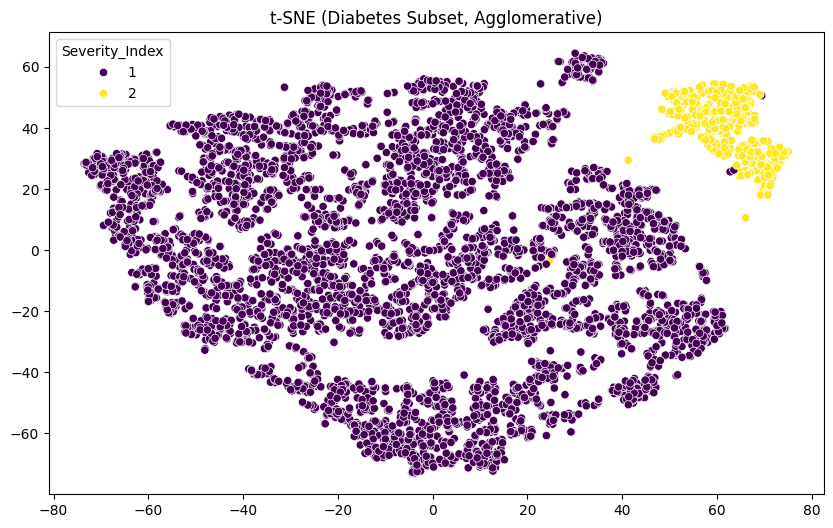

c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


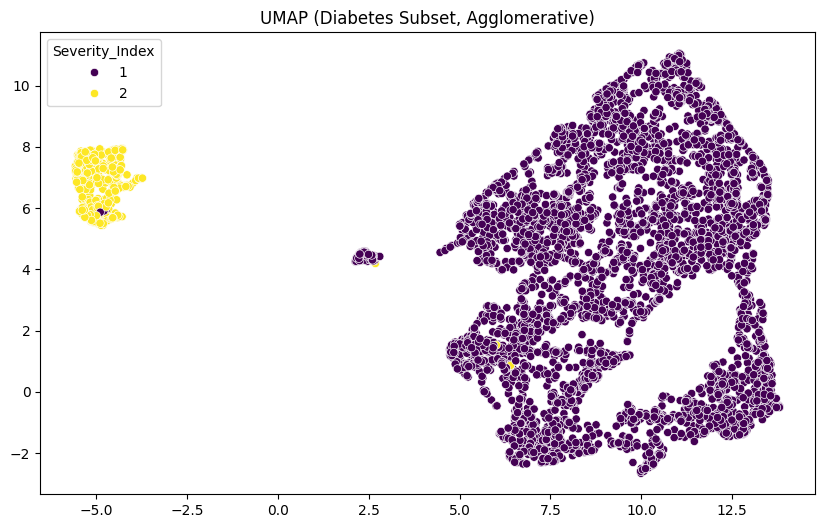

Kruskal-Wallis: H=0.3190452146750506, p=0.5721820016696337
Analysis complete for Diabetes subset with CCI.


In [5]:
# latent_features=pd.read_csv('latent_features_vae.csv')
# tabnet_predictions=pd.read_csv('tabnet_predictions.csv')

# data_merged=latent_features.merge(tabnet_predictions,on='Id',how='inner')
# X=data_merged.drop(columns=['Id','Predicted_Health_Index'])
# scaler=StandardScaler()
# X_scaled=scaler.fit_transform(X)

# cluster_range=range(2,10)
# sil_kmeans=[]
# for n in cluster_range:
#     km=KMeans(n_clusters=n,random_state=42)
#     labels=km.fit_predict(X_scaled)
#     sil_kmeans.append(silhouette_score(X_scaled,labels))
# optimal_k=cluster_range[np.argmax(sil_kmeans)]
# kmeans=KMeans(n_clusters=optimal_k,random_state=42).fit(X_scaled)
# kmeans_labels=kmeans.labels_

# sil_agg=[]
# for n in cluster_range:
#     agg=AgglomerativeClustering(n_clusters=n)
#     labels=agg.fit_predict(X_scaled)
#     sil_agg.append(silhouette_score(X_scaled,labels))
# optimal_agg=cluster_range[np.argmax(sil_agg)]
# agg=AgglomerativeClustering(n_clusters=optimal_agg)
# agg_labels=agg.fit_predict(X_scaled)

# neighbors=5
# from sklearn.neighbors import NearestNeighbors
# nbrs=NearestNeighbors(n_neighbors=neighbors).fit(X_scaled)
# distances,indices=nbrs.kneighbors(X_scaled)
# distances=np.sort(distances[:,neighbors-1],axis=0)
# epsilon=distances[int(0.9*len(distances))]
# db=DBSCAN(eps=epsilon,min_samples=5).fit(X_scaled)
# dbscan_labels=db.labels_

# def cluster_scores(X,labels):
#     if len(set(labels))>1:
#         sil=silhouette_score(X,labels)
#         ch=calinski_harabasz_score(X,labels)
#         db=davies_bouldin_score(X,labels)
#     else:
#         sil=ch=db=np.nan
#     return sil,ch,db

# sil_km,ch_km,db_km=cluster_scores(X_scaled,kmeans_labels)
# sil_a,ch_a,db_a=cluster_scores(X_scaled,agg_labels)
# if len(set(dbscan_labels))>1:
#     sil_db,ch_db,db_db=cluster_scores(X_scaled,dbscan_labels)
# else:
#     sil_db=ch_db=db_db=np.nan

# validation_df=pd.DataFrame({
#     'Method':['KMeans','Agglomerative','DBSCAN'],
#     'Silhouette':[sil_km,sil_a,sil_db],
#     'CH':[ch_km,ch_a,ch_db],
#     'DB':[db_km,db_a,db_db]
# })
# validation_df['Sil_rank']=validation_df['Silhouette'].rank(ascending=False)
# validation_df['CH_rank']=validation_df['CH'].rank(ascending=False)
# validation_df['DB_rank']=validation_df['DB'].rank(ascending=True)
# validation_df['Avg_rank']=validation_df[['Sil_rank','CH_rank','DB_rank']].mean(axis=1)
# best_method=validation_df.loc[validation_df['Avg_rank'].idxmin(),'Method']

# if best_method=='KMeans':
#     final_labels=kmeans_labels
# elif best_method=='Agglomerative':
#     final_labels=agg_labels
# else:
#     final_labels=dbscan_labels

# data_merged['Cluster']=final_labels
# cluster_map=data_merged.groupby('Cluster')['Predicted_Health_Index'].mean().sort_values().reset_index()
# cluster_map['Severity_Index']=range(1,len(cluster_map)+1)
# mapping=cluster_map.set_index('Cluster')['Severity_Index'].to_dict()
# data_merged['Severity_Index']=data_merged['Cluster'].map(mapping)

# tsne=TSNE(n_components=2,random_state=42)
# tsne_results=tsne.fit_transform(X_scaled)
# plt.figure(figsize=(10,6))
# sns.scatterplot(x=tsne_results[:,0],y=tsne_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
# plt.title(f't-SNE (Diabetes Subset, {best_method})')
# plt.show()

# reducer=umap.UMAP(n_components=2,random_state=42)
# umap_results=reducer.fit_transform(X_scaled)
# plt.figure(figsize=(10,6))
# sns.scatterplot(x=umap_results[:,0],y=umap_results[:,1],hue=data_merged['Severity_Index'],palette='viridis')
# plt.title(f'UMAP (Diabetes Subset, {best_method})')
# plt.show()

# clusters=data_merged['Cluster'].unique()
# normality_pvals=[]
# for c in clusters:
#     grp=data_merged[data_merged['Cluster']==c]['Predicted_Health_Index']
#     stat,p=shapiro(grp)
#     normality_pvals.append(p)

# if any(p<0.05 for p in normality_pvals):
#     groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
#     kw_stat,kw_p=kruskal(*groups)
#     print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
# else:
#     groups=[data_merged[data_merged['Cluster']==c]['Predicted_Health_Index'] for c in clusters]
#     lv_stat,lv_p=levene(*groups)
#     if lv_p<0.05:
#         kw_stat,kw_p=kruskal(*groups)
#         print(f"Kruskal-Wallis: H={kw_stat}, p={kw_p}")
#     else:
#         f_stat,f_p=f_oneway(*groups)
#         print(f"ANOVA: F={f_stat}, p={f_p}")

# print("Analysis complete for Diabetes subset with CCI.")